In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
cd drive/MyDrive/master_thesis/final_code

/content/drive/.shortcut-targets-by-id/16udig9ZMaNcASs5Maj6kv7tg-TL3PnSE/Master Thesis/final_code


In [3]:
import os 
import numpy as np
import matplotlib.pyplot as plt

from py_files.args import *

In [8]:
def show_runs(requirements, print_vars, last=None):
    runs = sorted(os.listdir(path='saved_runs'))
    runs = [run for run in runs if run != "old" and run !="saved"]
    if last: 
        runs = runs[-last:]

    # short_runs = ["_".join(run.split("_")[8:]) for run in runs]
    short_runs = runs
    runs = [run for _, run in sorted(zip(short_runs, runs))]
        
    for run in runs:
        ARGS = load_args(run, print_changed=False)

        if all([requirements[key] == vars(ARGS)[key] for key in requirements.keys()]):

            print(f"\n{run}\n")

            if print_vars:
                for key in print_vars:
                    if key in vars(ARGS).keys():
                        print(f"{key}: {vars(ARGS)[key]}")
                    else: 
                        print(f"{key} not in ARGS")
            else:
                for key, item in vars(ARGS).items():
                    print(f"{key}: {item}")

            print()

            mask_losses = pcmra_losses = dice_losses = None

            if os.path.exists(f'saved_runs/{run}/mask_loss.npy'):
                mask_losses = np.load(f'saved_runs/{run}/mask_loss.npy')

            if os.path.exists(f'saved_runs/{run}/pcmra_loss.npy'):
                pcmra_losses = np.load(f'saved_runs/{run}/pcmra_loss.npy')

            if os.path.exists(f'saved_runs/{run}/dice_loss.npy'):
                dice_losses = np.load(f'saved_runs/{run}/dice_loss.npy')

            fig, axes = plt.subplots(1, 3, figsize=(18,5))
            fig.patch.set_facecolor('white')

            if type(mask_losses) == np.ndarray:
                axes[0].plot(mask_losses[1:, 0], mask_losses[1:, 1], label='Train loss')
                axes[0].plot(mask_losses[1:, 0], mask_losses[1:, 3], label='Eval loss')
                axes[0].set_title('Mask Loss')

                i1, i2 = mask_losses[:, 1].argmin(), mask_losses[:, 3].argmin()
                print(f"Lowest train mask loss at epoch {int(mask_losses[i1, 0])}:\t{round(mask_losses[i1, 1], 6)}")
                print(f"Lowest eval  mask loss at epoch {int(mask_losses[i2, 0])}:\t{round(mask_losses[i2, 3], 6)}")
                print()

            if type(pcmra_losses)  == np.ndarray:
                axes[1].plot(pcmra_losses[1:, 0], pcmra_losses[1:, 1], label='Train loss')
                axes[1].plot(pcmra_losses[1:, 0], pcmra_losses[1:, 3], label='Eval loss')
                axes[1].set_title('PCMRA Loss')
                i5, i6 = pcmra_losses[:, 1].argmin(), pcmra_losses[:, 3].argmin()
                print(f"Lowest train pcmra loss at epoch {int(pcmra_losses[i5, 0])}:\t{round(pcmra_losses[i5, 1], 6)}")
                print(f"Lowest eval  pcmra loss at epoch {int(pcmra_losses[i6, 0])}:\t{round(pcmra_losses[i6, 3], 6)}")
                print()
            if type(dice_losses) == np.ndarray:
                axes[2].plot(dice_losses[1:, 0], dice_losses[1:, 1], label='Train loss')
                axes[2].plot(dice_losses[1:, 0], dice_losses[1:, 3], label='Eval loss')
                axes[2].set_title('Dice Loss')

                i3, i4 = dice_losses[:, 1].argmin(), dice_losses[:, 3].argmin()
                print(f"Lowest train dice loss at epoch {int(dice_losses[i3, 0])}:\t{round(dice_losses[i3, 1], 6)}")
                print(f"Lowest eval  dice loss at epoch {int(dice_losses[i4, 0])}:\t{round(dice_losses[i4, 3], 6)}")


            plt.show()

            print("\n\n\n")



combined_sdf_2021_09_04_12_34_52

pretrained: None
training_setup: combined
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 2200:	0.50695
Lowest eval  mask loss at epoch 1900:	0.511783

Lowest train pcmra loss at epoch 2150:	0.008001
Lowest eval  pcmra loss at epoch 1800:	0.011067

Lowest train dice loss at epoch 1550:	0.177219
Lowest eval  dice loss at epoch 1550:	0.225369


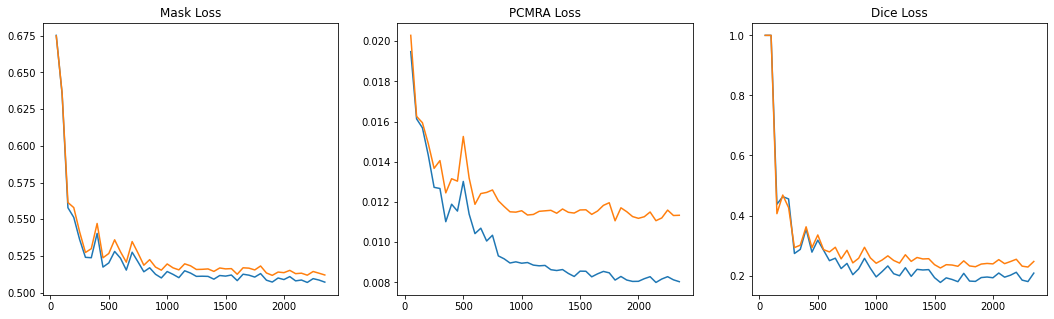






consec_sdf_2021_09_04_12_29_51

pretrained: reconstruction_run_1
training_setup: consecutively
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 800:	0.51487
Lowest eval  mask loss at epoch 800:	0.521987

Lowest train pcmra loss at epoch 0:	0.00478
Lowest eval  pcmra loss at epoch 0:	0.007354

Lowest train dice loss at epoch 600:	0.221366
Lowest eval  dice loss at epoch 600:	0.277099


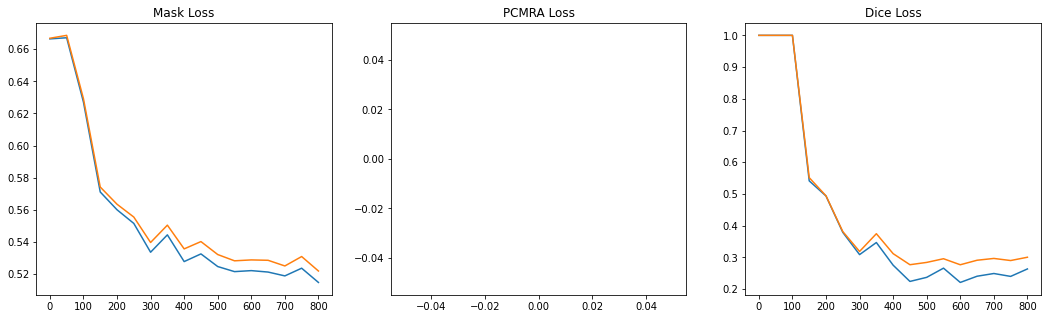






pi_gan_2021_09_04_12_36_04_colab_no_encoder_train

pretrained: reconstruction_run_1
training_setup: consecutively
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 650:	0.515826
Lowest eval  mask loss at epoch 650:	0.52145

Lowest train pcmra loss at epoch 0:	0.00478
Lowest eval  pcmra loss at epoch 0:	0.007354

Lowest train dice loss at epoch 500:	0.215586
Lowest eval  dice loss at epoch 550:	0.317716


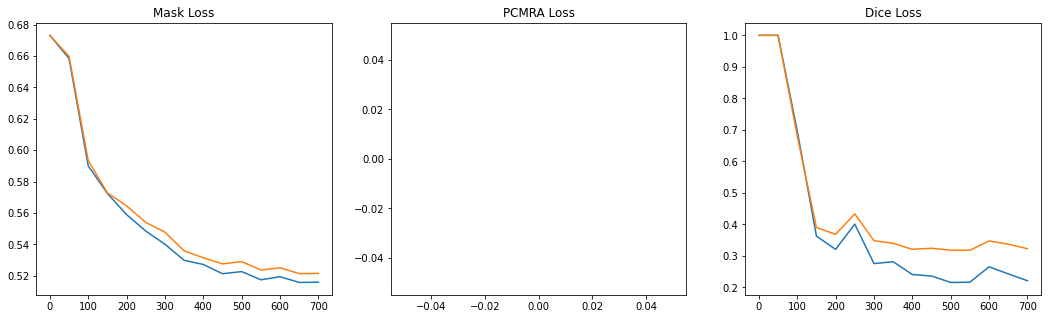






pi_gan_2021_09_04_13_23_30_colab_no_encoder_train

pretrained: reconstruction_run_2
training_setup: consecutively
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 600:	0.514849
Lowest eval  mask loss at epoch 600:	0.522184

Lowest train pcmra loss at epoch 0:	0.00458
Lowest eval  pcmra loss at epoch 0:	0.007511

Lowest train dice loss at epoch 400:	0.200082
Lowest eval  dice loss at epoch 400:	0.282602


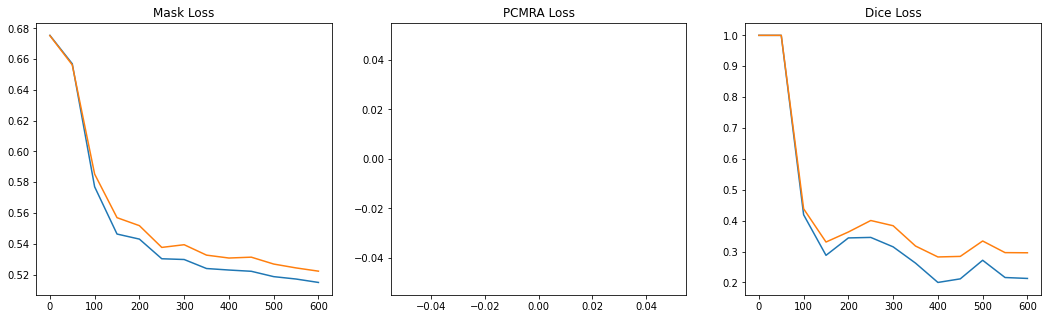






pi_gan_2021_09_04_14_01_15_colab_no_encoder_train

pretrained: reconstruction_run_3
training_setup: consecutively
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 750:	0.537719
Lowest eval  mask loss at epoch 750:	0.541059

Lowest train pcmra loss at epoch 0:	0.005333
Lowest eval  pcmra loss at epoch 0:	0.007722

Lowest train dice loss at epoch 700:	0.213717
Lowest eval  dice loss at epoch 500:	0.313913


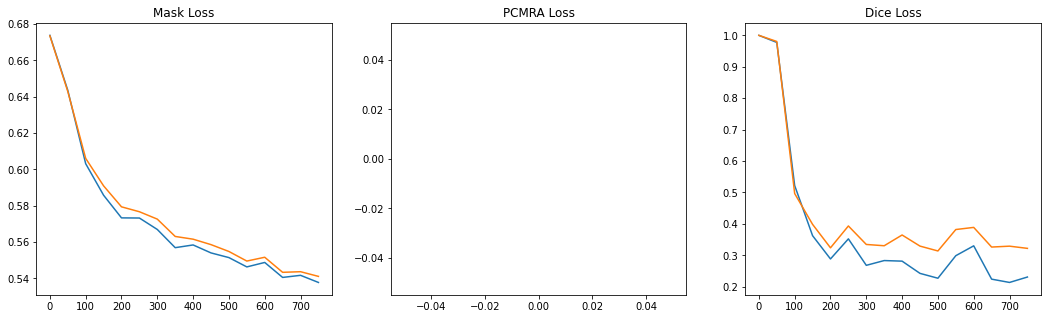






pi_gan_2021_09_04_14_51_55_colab

pretrained: reconstruction_run_1
training_setup: consecutively
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 800:	0.512543
Lowest eval  mask loss at epoch 800:	0.518081

Lowest train pcmra loss at epoch 0:	0.00478
Lowest eval  pcmra loss at epoch 0:	0.007354

Lowest train dice loss at epoch 650:	0.207005
Lowest eval  dice loss at epoch 650:	0.26842


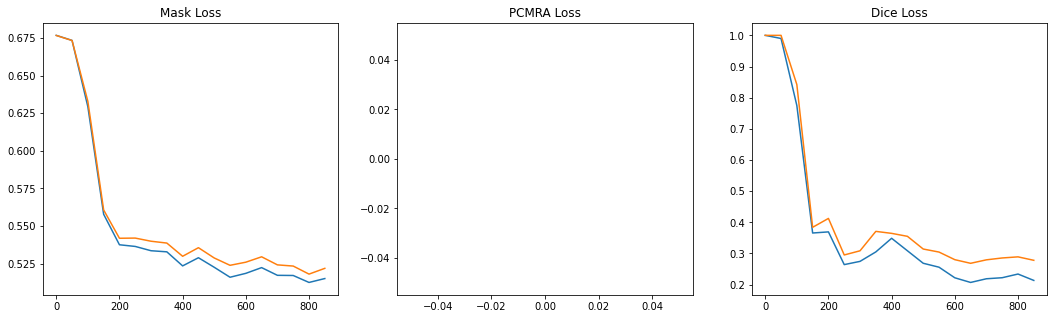






pi_gan_2021_09_04_14_52_51_colab_no_encoder_train

pretrained: reconstruction_run_1
training_setup: consecutively
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 800:	0.510834
Lowest eval  mask loss at epoch 800:	0.5178

Lowest train pcmra loss at epoch 0:	0.00478
Lowest eval  pcmra loss at epoch 0:	0.007354

Lowest train dice loss at epoch 650:	0.213094
Lowest eval  dice loss at epoch 450:	0.304989


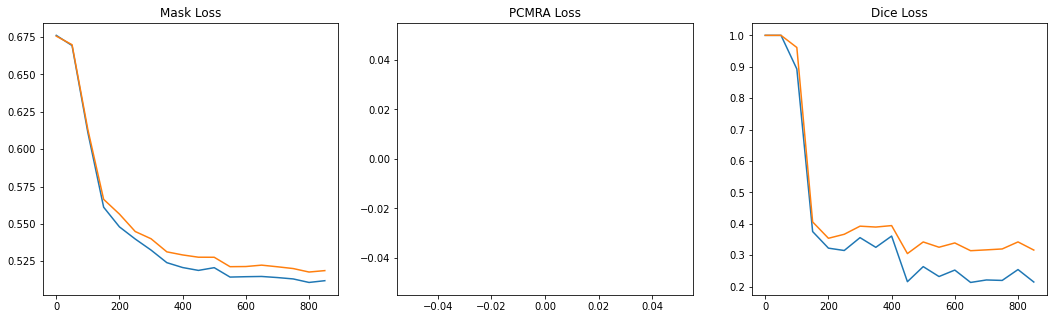






pi_gan_2021_09_04_17_05_18_colab

pretrained: reconstruction_run_2
training_setup: consecutively
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 750:	0.511432
Lowest eval  mask loss at epoch 1100:	0.517045

Lowest train pcmra loss at epoch 0:	0.00458
Lowest eval  pcmra loss at epoch 0:	0.007511

Lowest train dice loss at epoch 900:	0.19247
Lowest eval  dice loss at epoch 950:	0.246429


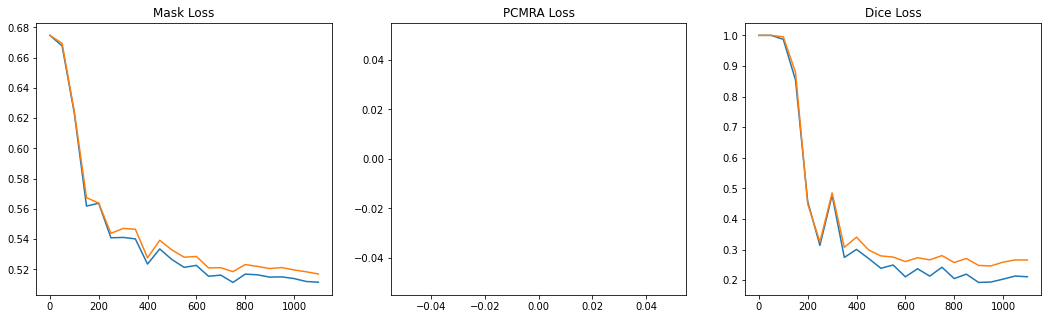






pi_gan_2021_09_04_17_06_00_colab_no_encoder_train

pretrained: reconstruction_run_3
training_setup: consecutively
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 900:	0.530984
Lowest eval  mask loss at epoch 900:	0.536895

Lowest train pcmra loss at epoch 0:	0.005333
Lowest eval  pcmra loss at epoch 0:	0.007722

Lowest train dice loss at epoch 600:	0.204875
Lowest eval  dice loss at epoch 600:	0.304739


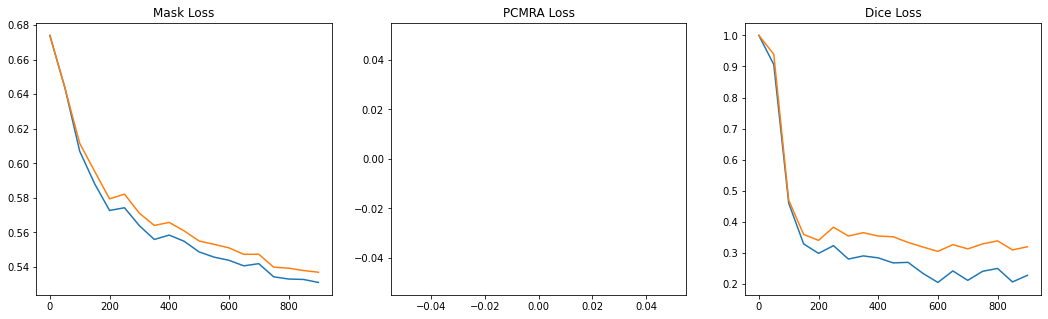






pi_gan_2021_09_04_18_02_04_colab_no_encoder_train

pretrained: reconstruction_run_1
training_setup: consecutively
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup: 1net
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 1650:	0.023568
Lowest eval  mask loss at epoch 650:	0.045822

Lowest train pcmra loss at epoch 0:	0.00478
Lowest eval  pcmra loss at epoch 0:	0.007354

Lowest train dice loss at epoch 1800:	0.168796
Lowest eval  dice loss at epoch 900:	0.29335


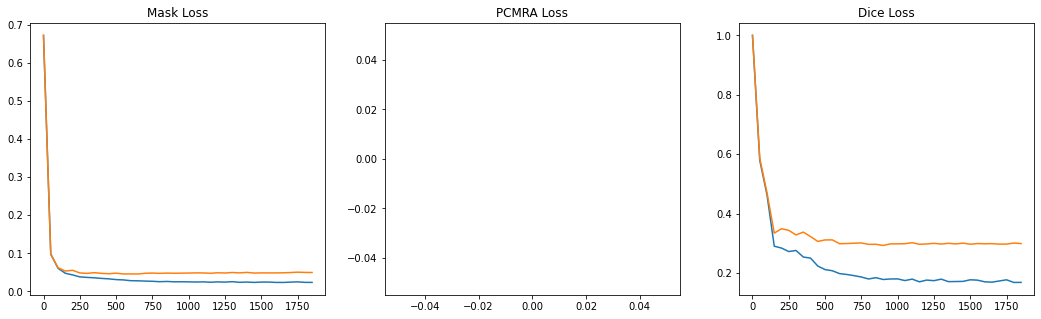






pi_gan_2021_09_04_18_35_04_________colab

pretrained: None
training_setup: combined
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 2800:	0.504511
Lowest eval  mask loss at epoch 2800:	0.508561

Lowest train pcmra loss at epoch 2700:	0.008949
Lowest eval  pcmra loss at epoch 2700:	0.011313

Lowest train dice loss at epoch 2400:	0.175546
Lowest eval  dice loss at epoch 2400:	0.223791


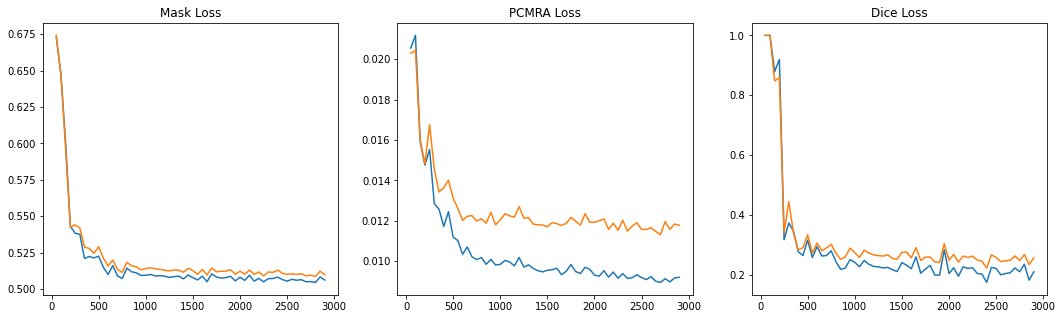






pi_gan_2021_09_04_19_27_16_colab_no_encoder_train

pretrained: reconstruction_run_2
training_setup: consecutively
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup: 1net
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 2100:	0.022688
Lowest eval  mask loss at epoch 750:	0.043662

Lowest train pcmra loss at epoch 0:	0.00458
Lowest eval  pcmra loss at epoch 0:	0.007511

Lowest train dice loss at epoch 2300:	0.157681
Lowest eval  dice loss at epoch 2200:	0.27482


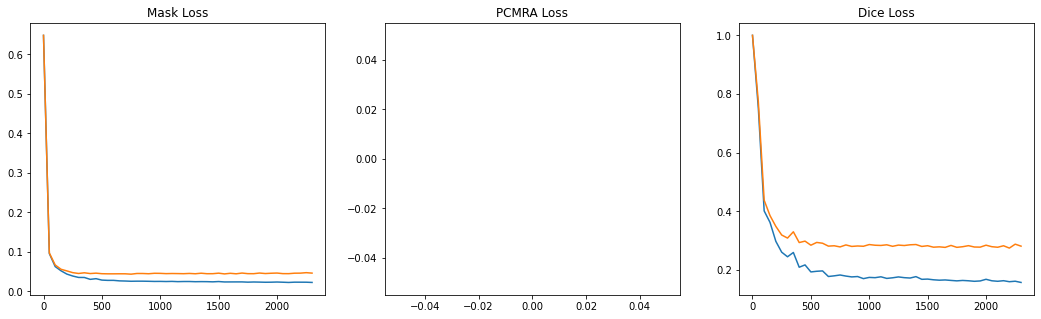






pi_gan_2021_09_04_19_46_59_colab

pretrained: reconstruction_run_3
training_setup: consecutively
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 750:	0.513693
Lowest eval  mask loss at epoch 750:	0.518673

Lowest train pcmra loss at epoch 0:	0.005333
Lowest eval  pcmra loss at epoch 0:	0.007722

Lowest train dice loss at epoch 550:	0.218391
Lowest eval  dice loss at epoch 550:	0.282475


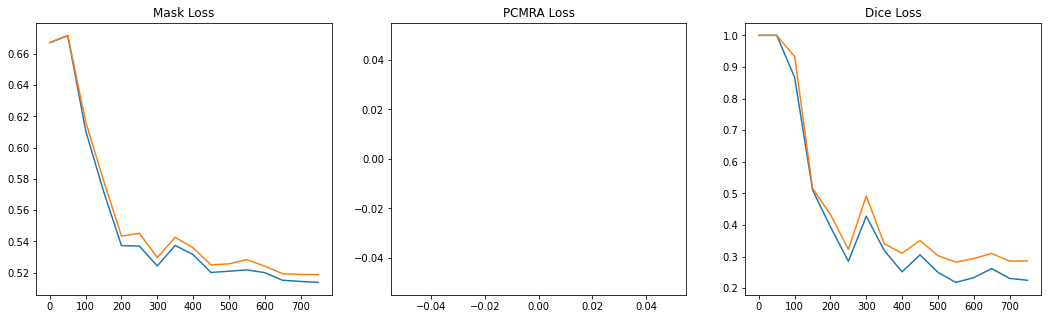






pi_gan_2021_09_04_21_14_44_colab_no_encoder_train

pretrained: reconstruction_run_3
training_setup: consecutively
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup: 1net
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 1250:	0.026151
Lowest eval  mask loss at epoch 550:	0.044583

Lowest train pcmra loss at epoch 0:	0.005333
Lowest eval  pcmra loss at epoch 0:	0.007722

Lowest train dice loss at epoch 1350:	0.18456
Lowest eval  dice loss at epoch 1350:	0.307331


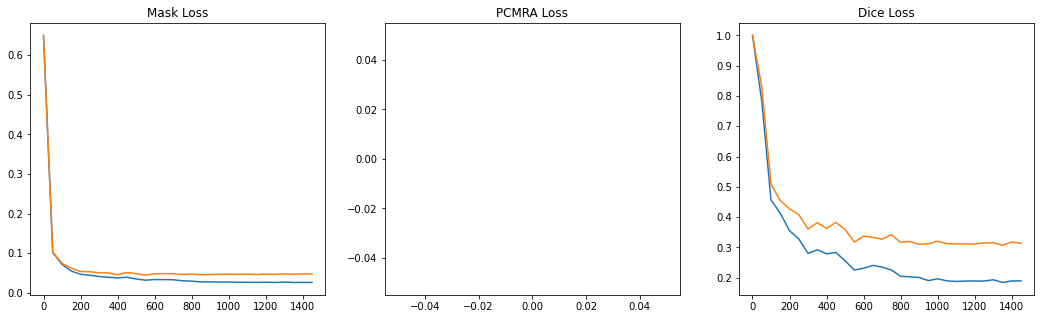






pi_gan_2021_09_04_21_35_40_colab

pretrained: reconstruction_run_1
training_setup: consecutively
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup: 1net
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 800:	0.025552
Lowest eval  mask loss at epoch 700:	0.04004

Lowest train pcmra loss at epoch 0:	0.00478
Lowest eval  pcmra loss at epoch 0:	0.007354

Lowest train dice loss at epoch 1000:	0.177827
Lowest eval  dice loss at epoch 1000:	0.256489


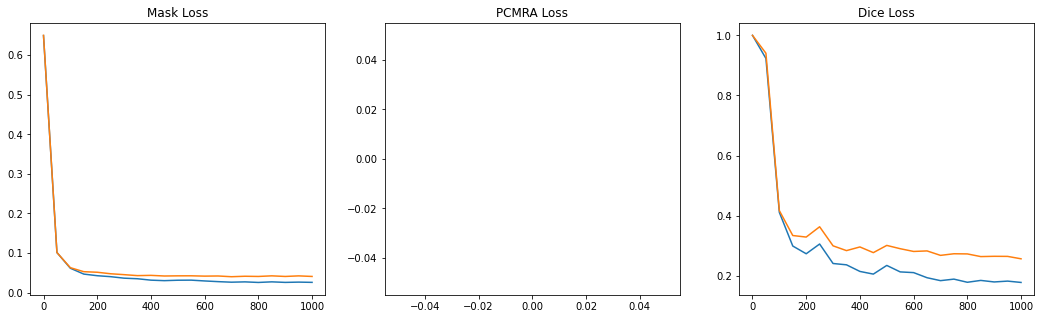






pi_gan_2021_09_04_23_43_31_colab

pretrained: reconstruction_run_2
training_setup: consecutively
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup: 1net
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 1400:	0.022966
Lowest eval  mask loss at epoch 1200:	0.038744

Lowest train pcmra loss at epoch 0:	0.00458
Lowest eval  pcmra loss at epoch 0:	0.007511

Lowest train dice loss at epoch 1400:	0.156789
Lowest eval  dice loss at epoch 1200:	0.237572


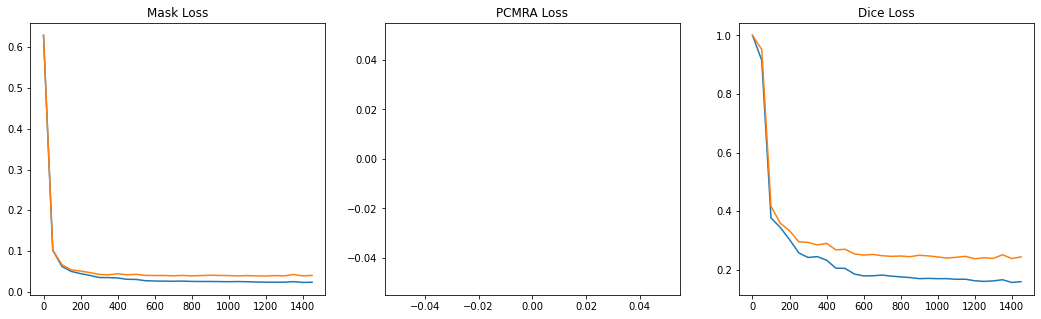






pi_gan_2021_09_05_09_21_57_colab

pretrained: None
training_setup: combined
segmentation: sdf
cnn_setup: golden
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 1700:	0.508528
Lowest eval  mask loss at epoch 1700:	0.512266

Lowest train pcmra loss at epoch 1450:	0.008556
Lowest eval  pcmra loss at epoch 1050:	0.011244

Lowest train dice loss at epoch 1800:	0.199391
Lowest eval  dice loss at epoch 1800:	0.234546


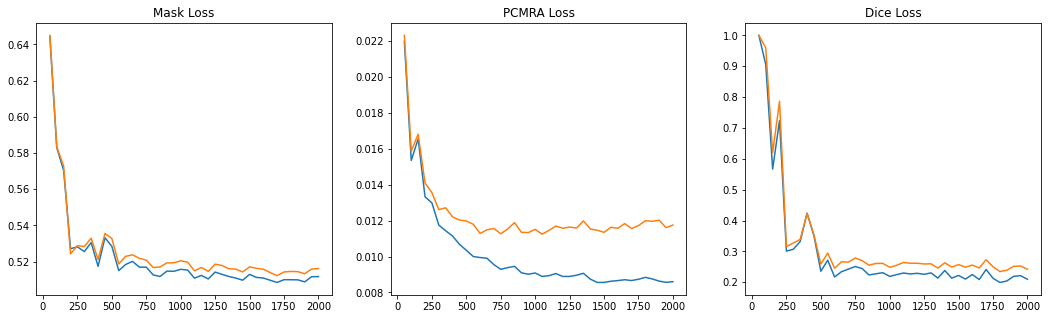






pi_gan_2021_09_05_09_23_55_colab

pretrained: None
training_setup: combined
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup: 1net
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 3050:	0.020613
Lowest eval  mask loss at epoch 1250:	0.036334

Lowest train pcmra loss at epoch 3050:	0.005296
Lowest eval  pcmra loss at epoch 3000:	0.008406

Lowest train dice loss at epoch 3050:	0.141806
Lowest eval  dice loss at epoch 2900:	0.226738


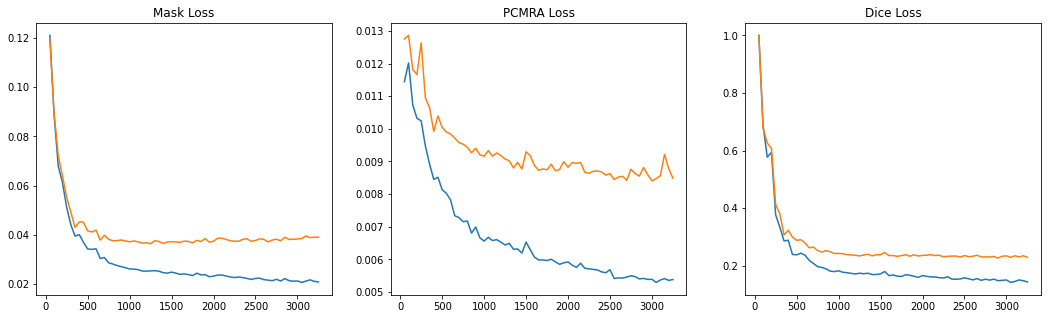






pi_gan_2021_09_05_09_24_11_colab

pretrained: reconstruction_run_2
training_setup: consecutively
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup: 1net
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 1000:	0.024314
Lowest eval  mask loss at epoch 1000:	0.03853

Lowest train pcmra loss at epoch 0:	0.00458
Lowest eval  pcmra loss at epoch 0:	0.007511

Lowest train dice loss at epoch 1100:	0.163543
Lowest eval  dice loss at epoch 1200:	0.243404


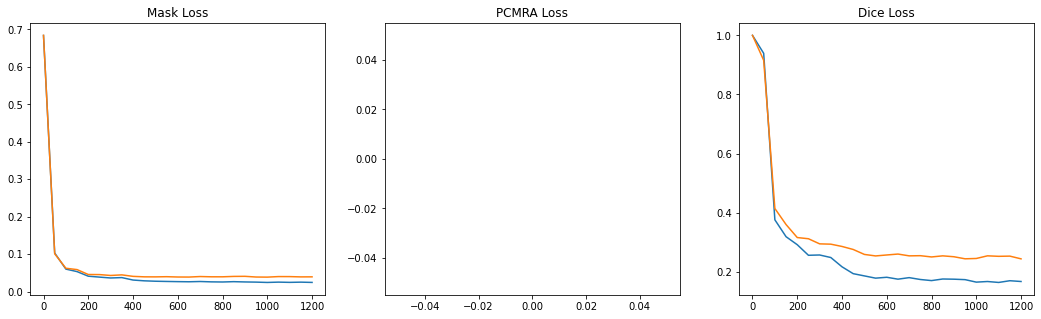






pi_gan_2021_09_05_12_02_28_colab

pretrained: reconstruction_run_3
training_setup: consecutively
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup: 1net
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 2000:	0.022991
Lowest eval  mask loss at epoch 2100:	0.038965

Lowest train pcmra loss at epoch 0:	0.005333
Lowest eval  pcmra loss at epoch 0:	0.007722

Lowest train dice loss at epoch 2100:	0.160183
Lowest eval  dice loss at epoch 1800:	0.244141


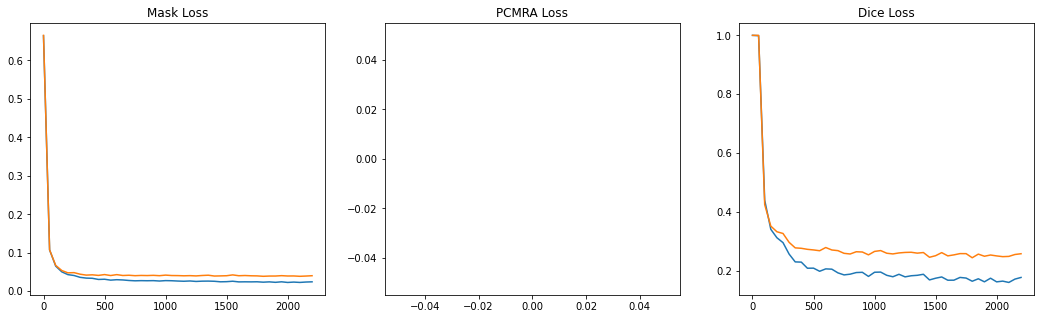






pi_gan_2021_09_07_08_56_58_colab

pretrained: None
training_setup: segmentation
segmentation: sdf
cnn_setup: maxpool
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 1350:	0.551225
Lowest eval  mask loss at epoch 1350:	0.552508

Lowest train dice loss at epoch 1250:	0.192766
Lowest eval  dice loss at epoch 1100:	0.222358


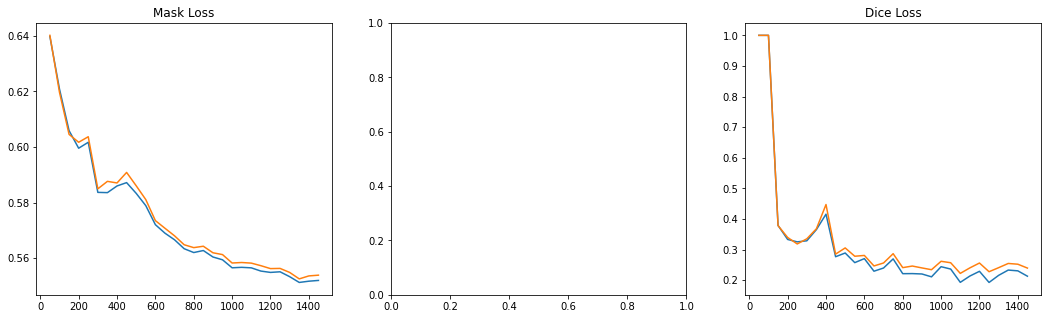






pi_gan_2021_09_09_08_06_01_______colab

pretrained: None
training_setup: segmentation
segmentation: sdf
cnn_setup: maxpool
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 50:	0.670742
Lowest eval  mask loss at epoch 50:	0.670629

Lowest train dice loss at epoch 0:	1.0
Lowest eval  dice loss at epoch 0:	1.0


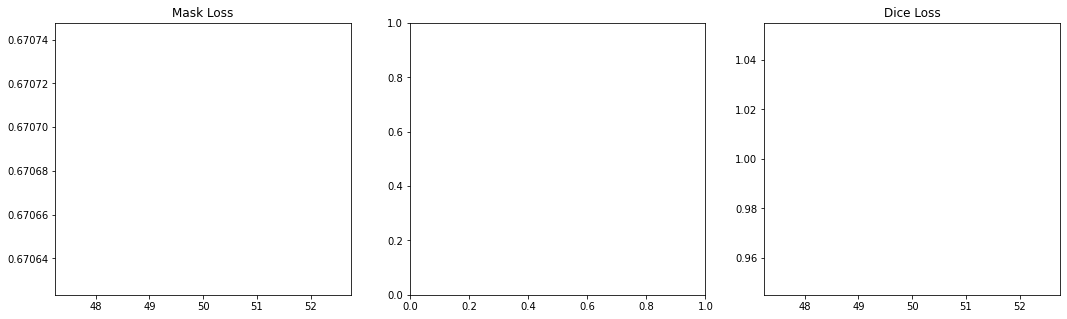






pi_gan_2021_09_09_08_06_51_____colab

pretrained: None
training_setup: segmentation
segmentation: sdf
cnn_setup: maxpool
mapping_setup: golden
pcmra_mapping_setup: 1net
first_omega_0: 30
lambda_sdf: 300.0

Lowest train mask loss at epoch 0:	0.614046
Lowest eval  mask loss at epoch 0:	0.614696

Lowest train dice loss at epoch 0:	1.0
Lowest eval  dice loss at epoch 0:	1.0


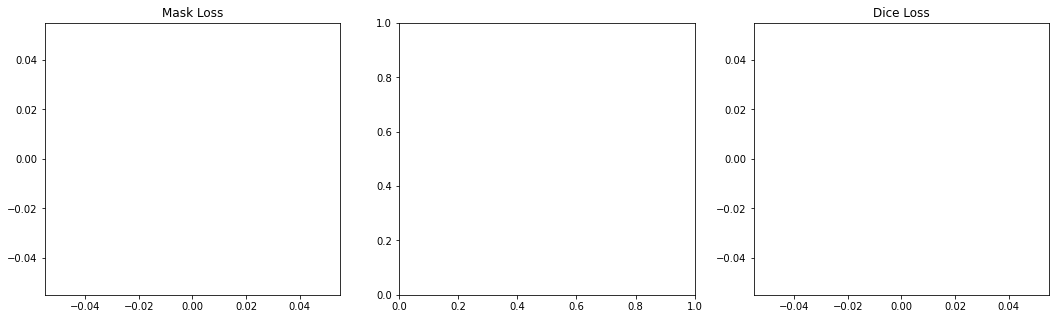






reconstruction_run_1

pretrained: pi_gan_2021_09_02_08_42_55_colab
training_setup: reconstruction
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup not in ARGS
first_omega_0: 30
lambda_sdf: 300.0

Lowest train pcmra loss at epoch 500:	0.00478
Lowest eval  pcmra loss at epoch 500:	0.007354



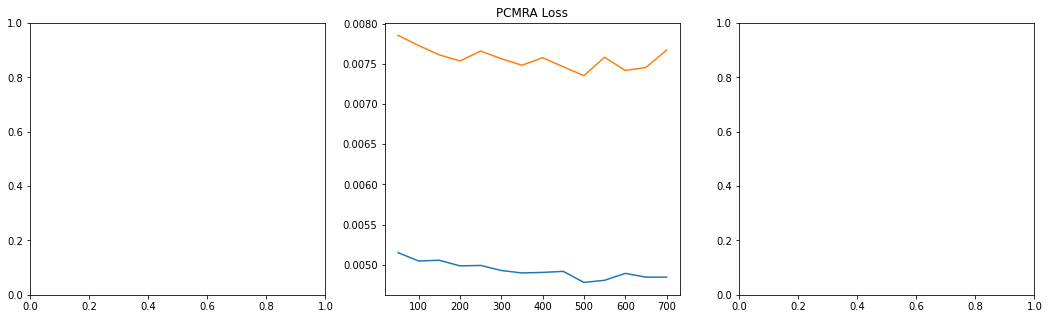






reconstruction_run_2

pretrained: None
training_setup: segmentation
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup not in ARGS
first_omega_0: 30.0
lambda_sdf: 300.0

Lowest train pcmra loss at epoch 2700:	0.00457
Lowest eval  pcmra loss at epoch 2500:	0.007511



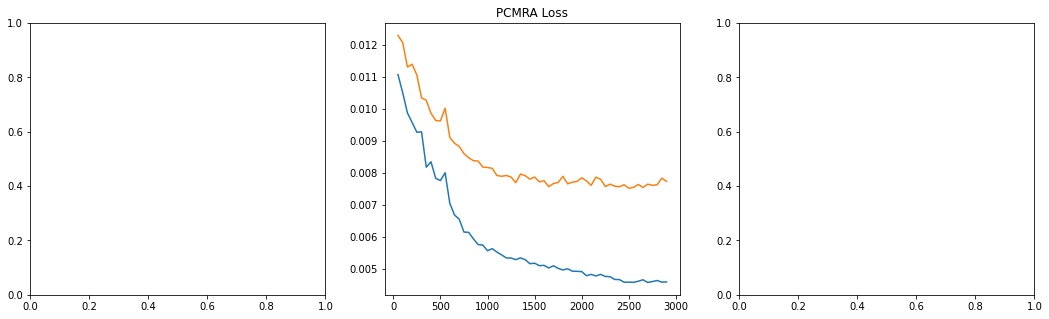






reconstruction_run_3

pretrained: None
training_setup: segmentation
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup not in ARGS
first_omega_0: 30.0
lambda_sdf: 300.0

Lowest train pcmra loss at epoch 2400:	0.005135
Lowest eval  pcmra loss at epoch 2200:	0.007722



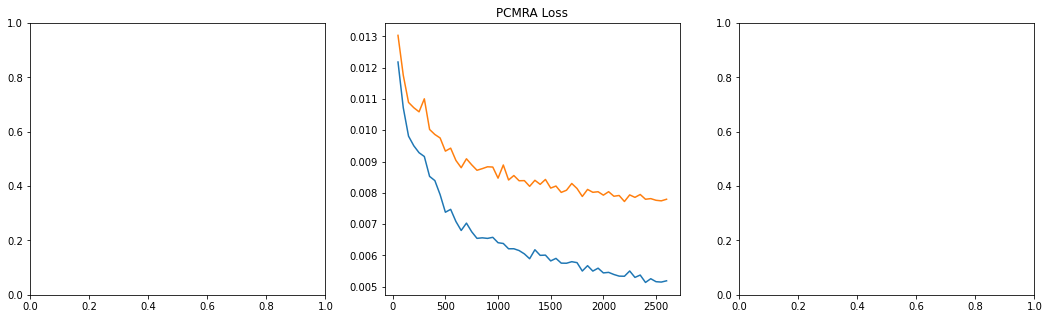






segmentation_binary

pretrained: None
training_setup: segmentation
segmentation: binary
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup not in ARGS
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 2500:	0.022149
Lowest eval  mask loss at epoch 1300:	0.032403

Lowest train dice loss at epoch 2500:	0.152042
Lowest eval  dice loss at epoch 2600:	0.204228


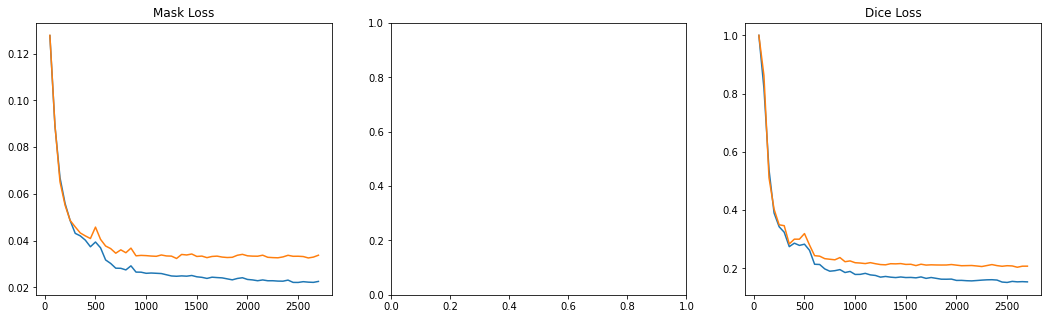






segmentation_sdf_lambda_100

pretrained: None
training_setup: segmentation
segmentation: sdf
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup not in ARGS
first_omega_0: 100
lambda_sdf: 100

Lowest train mask loss at epoch 1200:	0.494146
Lowest eval  mask loss at epoch 1200:	0.499534

Lowest train dice loss at epoch 1300:	0.236807
Lowest eval  dice loss at epoch 1300:	0.26356


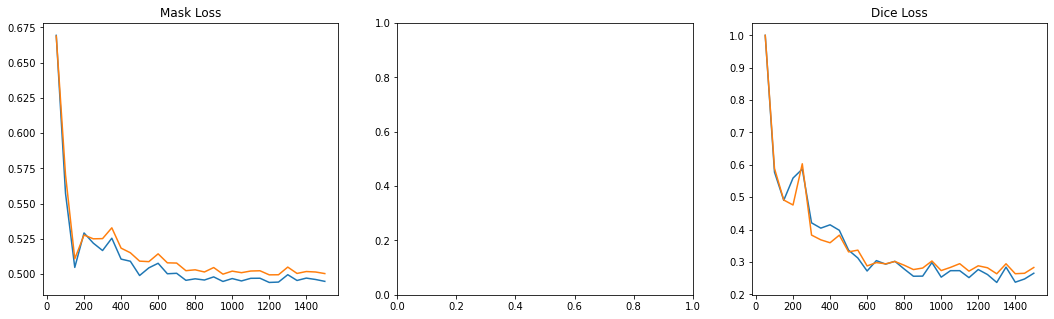






segmentation_sdf_lambda_300

pretrained: None
training_setup: segmentation
segmentation: sdf
cnn_setup: golden
mapping_setup: 1net
pcmra_mapping_setup not in ARGS
first_omega_0: 100
lambda_sdf: 300.0

Lowest train mask loss at epoch 800:	0.516802
Lowest eval  mask loss at epoch 800:	0.521257

Lowest train dice loss at epoch 900:	0.231581
Lowest eval  dice loss at epoch 900:	0.253654


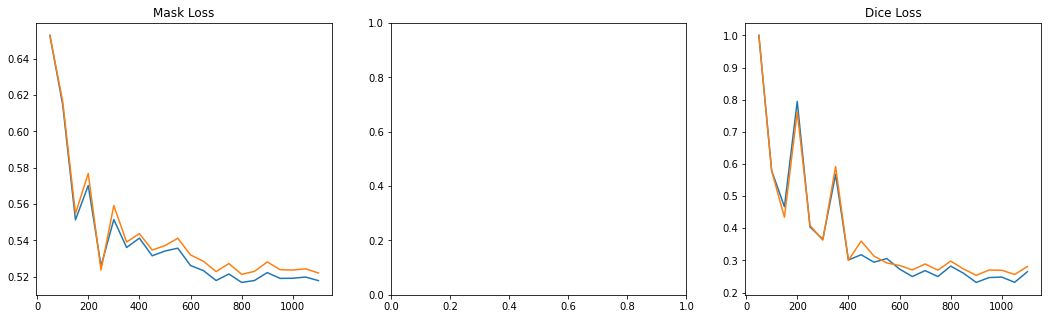

In [10]:
# requirements = {"cnn_setup": -6}
requirements = {}

# print_vars = None
print_vars = ["pretrained", "training_setup", "segmentation", "cnn_setup", "mapping_setup", "pcmra_mapping_setup", "first_omega_0", "lambda_sdf"]

show_runs(requirements, print_vars, last=None)

In [ ]:
def show_losses(requirements, name_contains):

    runs = sorted(os.listdir(path='saved_runs'))   
    runs = [run for run in runs if run != "old" and run !="saved"]
    short_runs = ["_".join(run.split("_")[8:]) for run in runs]
    runs = [run for _, run in sorted(zip(short_runs, runs))]
    
    for run in runs:
        ARGS = load_args(run, print_changed=False, silent=True)
        
        if name_contains in ARGS.name and all([requirements[key] == vars(ARGS)[key] for key in requirements.keys()]):

            # if print_vars:
            #     for key in print_vars:
            #         if key in vars(ARGS).keys():
            #             print(f"{key}: {vars(ARGS)[key]}")
            #         else: 
            #             print(f"{key} not in ARGS")

        
            mask_losses = pcmra_losses = dice_losses = None
            mask_loss = pcmra_loss = dice_loss = None
            epochs = None

            if os.path.exists(f'saved_runs/{run}/mask_loss.npy'):
                mask_losses = np.load(f'saved_runs/{run}/mask_loss.npy')
                mask_loss = mask_losses[:, 3].min()
                epochs = mask_losses[-1, 0]

            if os.path.exists(f'saved_runs/{run}/pcmra_loss.npy'):
                pcmra_losses = np.load(f'saved_runs/{run}/pcmra_loss.npy')
                pcmra_loss = pcmra_losses[:, 3].min()
                epochs = pcmra_losses[-1, 0]

            if os.path.exists(f'saved_runs/{run}/dice_loss.npy'):
                dice_losses = np.load(f'saved_runs/{run}/dice_loss.npy')
                dice_loss = dice_losses[:, 3].min()
                epochs = dice_losses[-1, 0]
            
            if epochs == None: 
                print(run, "empty")
            else:
                print(f"{run.ljust(65)} \t epochs: {str(round(epochs)).ljust(5)} \t pcmra: {str(pcmra_loss).ljust(8)} \t mask: {str(mask_loss).ljust(8)} \t dice: {str(dice_loss).ljust(8)}")


In [ ]:
show_losses({}, "")

pi_gan_2021_08_26_16_30_22_pi_gan_2021_08_26_13_15_07_segmentation_sdf_omega_300_run_0_continued 	 epochs: 0     	 pcmra: None     	 mask: 0.526334 	 dice: 0.305853
pi_gan_2021_08_26_16_31_46_pi_gan_2021_08_26_13_15_07_segmentation_sdf_omega_300_run_0_continued 	 epochs: 1250  	 pcmra: None     	 mask: 0.516758 	 dice: 0.235526
pi_gan_2021_08_26_16_32_33_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 0     	 pcmra: None     	 mask: 0.665541 	 dice: 0.96502 
pi_gan_2021_08_26_16_37_21_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 200   	 pcmra: None     	 mask: 0.518627 	 dice: 0.237869
pi_gan_2021_08_26_17_14_51_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 350   	 pcmra: None     	 mask: 0.516689 	 dice: 0.233347
pi_gan_2021_08_25_16_42_28_reconstruction_1net_run_0              	 epochs: 2900  	 pcmra: 0.007511 	 mask: None     	 dice: None    
pi_gan_2021_08

CNN setup

In [ ]:
name_contains = "reconstruction"

requirements = {
                "mapping_setup": "golden", 
                "first_omega_0": 30
                }

show_losses(requirements, name_contains)

requirements = {
                "mapping_setup": "golden_deep", 
                "first_omega_0": 30
                }

show_losses(requirements, name_contains)

pi_gan_2021_08_26_01_53_23_reconstruction_batchnorm_cnn_run_0     	 epochs: 2050  	 pcmra: 0.007644 	 mask: None     	 dice: None    
pi_gan_2021_08_24_08_21_25_reconstruction_golden_cnn_run_0        	 epochs: 1350  	 pcmra: 0.008052 	 mask: None     	 dice: None    
pi_gan_2021_08_25_07_34_12_reconstruction_maxpool_cnn_run_0       	 epochs: 1500  	 pcmra: 0.007655 	 mask: None     	 dice: None    
pi_gan_2021_08_26_13_22_36_reconstruction_maxpool_cnn_run_0       	 epochs: 1350  	 pcmra: 0.007895 	 mask: None     	 dice: None    
pi_gan_2021_08_26_13_59_38_reconstruction_omega_30_run_0          	 epochs: 1450  	 pcmra: 0.008018 	 mask: None     	 dice: None    
pi_gan_2021_08_25_19_06_50_reconstruction_deep_cnn_run_0          	 epochs: 1650  	 pcmra: 0.008922 	 mask: None     	 dice: None    


In [ ]:
name_contains = "segmentation_bin"

requirements = {
                "mapping_setup": "golden",
                "first_omega_0": 30
                }

show_losses(requirements, name_contains)
requirements = {
                "mapping_setup": "golden_deep",
                "first_omega_0": 30
                }

show_losses(requirements, name_contains)

pi_gan_2021_08_26_06_10_21_segmentation_bin_batchnorm_cnn_run_0   	 epochs: 2000  	 pcmra: None     	 mask: 0.033127 	 dice: 0.202051
pi_gan_2021_08_24_10_01_55_segmentation_bin_golden_cnn_run_0      	 epochs: 1200  	 pcmra: None     	 mask: 0.034219 	 dice: 0.212213
pi_gan_2021_08_24_13_20_46_segmentation_bin_golden_cnn_run_0      	 epochs: 4100  	 pcmra: None     	 mask: 0.032904 	 dice: 0.196222
pi_gan_2021_08_24_18_29_09_segmentation_bin_golden_cnn_run_1      	 epochs: 3650  	 pcmra: None     	 mask: 0.032237 	 dice: 0.19747 
pi_gan_2021_08_24_23_06_18_segmentation_bin_golden_cnn_run_2      	 epochs: 2450  	 pcmra: None     	 mask: 0.035571 	 dice: 0.213449
pi_gan_2021_08_25_11_53_57_segmentation_bin_maxpool_cnn_run_0     	 epochs: 2400  	 pcmra: None     	 mask: 0.034919 	 dice: 0.227679
pi_gan_2021_08_26_17_17_00_segmentation_bin_maxpool_cnn_run_0     	 epochs: 500   	 pcmra: None     	 mask: 0.048676 	 dice: 0.329768
pi_gan_2021_08_25_22_43_25_segmentation_bin_deep_cnn_run_0    

In [ ]:
name_contains = "segmentation_sdf"

requirements = {
                "mapping_setup": "golden", 
                "first_omega_0": 30
                }

show_losses(requirements, name_contains)

requirements = {
                "mapping_setup": "golden_deep", 
                "first_omega_0": 30
                }

show_losses(requirements, name_contains)

pi_gan_2021_08_26_16_37_21_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 200   	 pcmra: None     	 mask: 0.518627 	 dice: 0.237869
pi_gan_2021_08_26_17_14_51_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 350   	 pcmra: None     	 mask: 0.516689 	 dice: 0.233347
pi_gan_2021_08_25_02_39_12_segmentation_sdf_golden_cnn_run_1      	 epochs: 1000  	 pcmra: None     	 mask: 0.517821 	 dice: 0.252145
pi_gan_2021_08_25_04_01_47_segmentation_sdf_golden_cnn_run_2      	 epochs: 1000  	 pcmra: None     	 mask: 0.518296 	 dice: 0.25866 
pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0 	 epochs: 1200  	 pcmra: None     	 mask: 0.515205 	 dice: 0.232354


Mapping Setup

In [ ]:
name_contains = "reconstruction"

requirements = {
                "cnn_setup": "golden", 
                "first_omega_0": 30
                }

show_losses(requirements, name_contains)

pi_gan_2021_08_25_16_42_28_reconstruction_1net_run_0              	 epochs: 2900  	 pcmra: 0.007511 	 mask: None     	 dice: None    
pi_gan_2021_08_25_08_17_52_reconstruction_2net_run_0              	 epochs: 2350  	 pcmra: 0.007413 	 mask: None     	 dice: None    
pi_gan_2021_08_24_08_21_29_reconstruction_4net_run_0              	 epochs: 1500  	 pcmra: 0.008319 	 mask: None     	 dice: None    
pi_gan_2021_08_24_08_21_25_reconstruction_golden_cnn_run_0        	 epochs: 1350  	 pcmra: 0.008052 	 mask: None     	 dice: None    
pi_gan_2021_08_26_13_59_38_reconstruction_omega_30_run_0          	 epochs: 1450  	 pcmra: 0.008018 	 mask: None     	 dice: None    


In [ ]:
name_contains = "segmentation_bin"

requirements = {
                "cnn_setup": "golden", 
                "first_omega_0": 30
                }

show_losses(requirements, name_contains)

pi_gan_2021_08_25_22_51_18_segmentation_bin_1net_run_0            	 epochs: 2200  	 pcmra: None     	 mask: 0.032207 	 dice: 0.204496
pi_gan_2021_08_25_13_09_51_segmentation_bin_2net_run_0            	 epochs: 1700  	 pcmra: None     	 mask: 0.032736 	 dice: 0.208269
pi_gan_2021_08_24_10_12_56_segmentation_bin_4net_run_0            	 epochs: 1250  	 pcmra: None     	 mask: 0.03223  	 dice: 0.20638 
pi_gan_2021_08_24_14_22_13_segmentation_bin_4net_run_0            	 epochs: 2300  	 pcmra: None     	 mask: 0.033289 	 dice: 0.206564
pi_gan_2021_08_24_17_15_14_segmentation_bin_4net_run_1            	 epochs: 2850  	 pcmra: None     	 mask: 0.033113 	 dice: 0.202218
pi_gan_2021_08_24_20_48_01_segmentation_bin_4net_run_2            	 epochs: 3950  	 pcmra: None     	 mask: 0.031239 	 dice: 0.198695
pi_gan_2021_08_24_10_01_55_segmentation_bin_golden_cnn_run_0      	 epochs: 1200  	 pcmra: None     	 mask: 0.034219 	 dice: 0.212213
pi_gan_2021_08_24_13_20_46_segmentation_bin_golden_cnn_run_0  

In [ ]:
name_contains = "segmentation_sdf"

requirements = {
                "cnn_setup": "golden", 
                "first_omega_0": 30
                }

show_losses(requirements, name_contains)

pi_gan_2021_08_26_16_37_21_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 200   	 pcmra: None     	 mask: 0.518627 	 dice: 0.237869
pi_gan_2021_08_26_17_14_51_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 350   	 pcmra: None     	 mask: 0.516689 	 dice: 0.233347
pi_gan_2021_08_25_01_44_14_segmentation_sdf_4net_run_0            	 epochs: 1350  	 pcmra: None     	 mask: 0.520612 	 dice: 0.24591 
pi_gan_2021_08_25_04_00_07_segmentation_sdf_4net_run_2            	 epochs: 350   	 pcmra: None     	 mask: 0.525972 	 dice: 0.309857
pi_gan_2021_08_25_02_39_12_segmentation_sdf_golden_cnn_run_1      	 epochs: 1000  	 pcmra: None     	 mask: 0.517821 	 dice: 0.252145
pi_gan_2021_08_25_04_01_47_segmentation_sdf_golden_cnn_run_2      	 epochs: 1000  	 pcmra: None     	 mask: 0.518296 	 dice: 0.25866 
pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0 	 epochs: 1200  	 pcmra: None     	 mask: 0.515

Omega_0

In [ ]:
name_contains = "reconstruction"

requirements = {
                "cnn_setup": "golden", 
                "mapping_setup": "golden", 
                }

show_losses(requirements, name_contains)

pi_gan_2021_08_24_08_21_25_reconstruction_golden_cnn_run_0        	 epochs: 1350  	 pcmra: 0.008052 	 mask: None     	 dice: None    
pi_gan_2021_08_24_08_21_30_reconstruction_omega_100_run_0         	 epochs: 1250  	 pcmra: 0.008215 	 mask: None     	 dice: None    
pi_gan_2021_08_24_20_49_39_reconstruction_omega_100_run_0         	 epochs: 3050  	 pcmra: 0.007652 	 mask: None     	 dice: None    
pi_gan_2021_08_25_12_57_58_reconstruction_omega_10_run_0          	 epochs: 1850  	 pcmra: 0.007905 	 mask: None     	 dice: None    
pi_gan_2021_08_25_19_57_18_reconstruction_omega_300_run_0         	 epochs: 3100  	 pcmra: 0.007697 	 mask: None     	 dice: None    
pi_gan_2021_08_26_13_59_38_reconstruction_omega_30_run_0          	 epochs: 1450  	 pcmra: 0.008018 	 mask: None     	 dice: None    


In [ ]:
name_contains = "segmentation_bin"

requirements = {
                "cnn_setup": "golden", 
                "mapping_setup": "golden", 
                }

show_losses(requirements, name_contains)

pi_gan_2021_08_24_10_01_55_segmentation_bin_golden_cnn_run_0      	 epochs: 1200  	 pcmra: None     	 mask: 0.034219 	 dice: 0.212213
pi_gan_2021_08_24_13_20_46_segmentation_bin_golden_cnn_run_0      	 epochs: 4100  	 pcmra: None     	 mask: 0.032904 	 dice: 0.196222
pi_gan_2021_08_24_18_29_09_segmentation_bin_golden_cnn_run_1      	 epochs: 3650  	 pcmra: None     	 mask: 0.032237 	 dice: 0.19747 
pi_gan_2021_08_24_23_06_18_segmentation_bin_golden_cnn_run_2      	 epochs: 2450  	 pcmra: None     	 mask: 0.035571 	 dice: 0.213449
pi_gan_2021_08_25_07_42_55_segmentation_bin_omega_100_run_0       	 epochs: 2950  	 pcmra: None     	 mask: 0.033682 	 dice: 0.20639 
pi_gan_2021_08_25_15_15_59_segmentation_bin_omega_10_run_0        	 epochs: 2400  	 pcmra: None     	 mask: 0.033719 	 dice: 0.207952
pi_gan_2021_08_25_23_48_44_segmentation_bin_omega_300_run_0       	 epochs: 2450  	 pcmra: None     	 mask: 0.044674 	 dice: 0.292748


In [ ]:
name_contains = "segmentation_sdf"

requirements = {
                "cnn_setup": "golden", 
                "mapping_setup": "golden", 
                }

show_losses(requirements, name_contains)

pi_gan_2021_08_26_16_30_22_pi_gan_2021_08_26_13_15_07_segmentation_sdf_omega_300_run_0_continued 	 epochs: 0     	 pcmra: None     	 mask: 0.526334 	 dice: 0.305853
pi_gan_2021_08_26_16_31_46_pi_gan_2021_08_26_13_15_07_segmentation_sdf_omega_300_run_0_continued 	 epochs: 1250  	 pcmra: None     	 mask: 0.516758 	 dice: 0.235526
pi_gan_2021_08_26_16_32_33_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 0     	 pcmra: None     	 mask: 0.665541 	 dice: 0.96502 
pi_gan_2021_08_26_16_37_21_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 200   	 pcmra: None     	 mask: 0.518627 	 dice: 0.237869
pi_gan_2021_08_26_17_14_51_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued 	 epochs: 350   	 pcmra: None     	 mask: 0.516689 	 dice: 0.233347
pi_gan_2021_08_26_18_57_14_pi_gan_2021_08_26_13_33_34_segmentation_sdf_lambda_inter_100.0_run_0_continued empty
pi_gan_2021_08_25_02_39_12_segmentat

# Show test losses

In [ ]:
def show_test_loss(requirements, name_contains):

    runs = sorted(os.listdir(path='saved_runs'))   
    runs = [run for run in runs if run != "old" and run !="saved"]
    short_runs = ["_".join(run.split("_")[8:]) for run in runs]
    runs = [run for _, run in sorted(zip(short_runs, runs))]
    
    for run in runs:
        ARGS = load_args(run, print_changed=False, silent=True)
        
        if name_contains in ARGS.name and all([requirements[key] == vars(ARGS)[key] for key in requirements.keys()]):
            if os.path.exists(f'saved_runs/{run}/test_losses.npy'):
                losses = np.load(f'saved_runs/{run}/test_losses.npy')

                print(f"{run.ljust(65)} \t pcmra: {str(losses[0]).ljust(8)} \t mask: {str(losses[1]).ljust(8)} \t dice: {str(losses[2]).ljust(8)}")


In [ ]:
show_test_loss(requirements, name_contains)

pi_gan_2021_08_25_02_39_12_segmentation_sdf_golden_cnn_run_1      	 pcmra: 0.047428 	 mask: 0.518327 	 dice: 0.286234
pi_gan_2021_08_25_04_01_47_segmentation_sdf_golden_cnn_run_2      	 pcmra: 0.049051 	 mask: 0.522883 	 dice: 0.295049
pi_gan_2021_08_25_11_59_17_segmentation_sdf_omega_100_run_0       	 pcmra: 0.0406   	 mask: 0.526909 	 dice: 0.27944 
pi_gan_2021_08_25_18_21_47_segmentation_sdf_omega_10_run_0        	 pcmra: 0.032625 	 mask: 0.526239 	 dice: 0.295626
